# Data Set Information

O conjunto de dados está em 10 min por cerca de 4,5 meses. As condições de temperatura e umidade da casa foram monitoradas com uma rede de sensores sem fio ZigBee. Cada nó wireless transmitiu as condições de temperatura e umidade em torno de 3,3 min. Em seguida, os dados sem fio foram calculados por períodos de 10 minutos. Os dados de energia foram registrados a cada 10 minutos com medidores de energia do barramento m. O tempo da estação meteorológica do aeroporto mais próximo (Aeroporto de Chievres, Bélgica) foi baixado de um conjunto de dados públicos da Reliable Prognosis (rp5.ru) e mesclado com os conjuntos de dados experimentais usando a coluna de data e hora. Duas variáveis aleatórias foram incluídas no conjunto de dados para testar os modelos de regressão e para filtrar atributos não preditivos (parâmetros).


1) data hora ano-mês-dia hora: minuto: segundos
2) Eletrodomésticos, uso de energia em
3) lâmpadas Wh , consumo de energia de luminárias na casa em Wh
4) T1, Temperatura na área da cozinha, em Celsius
5) RH_1, Umidade na área da cozinha, em%
6) T2, Temperatura na área da sala, em Celsius
7) RH_2, Umidade na área da sala, em%
8) T3, Temperatura na área da lavanderia
9) RH_3, Umidade na área da lavanderia, em%
10) T4, Temperatura na sala do escritório, em Celsius
11) RH_4, Umidade na sala do escritório , em%
12) T5, Temperatura no banheiro, em Celsius
13) RH_5, Umidade no banheiro, em%
14) T6, Temperatura externa (lado norte), em Celsius
15) RH_6, Umidade externa (lado norte), em%
16) T7, Temperatura na sala de engomar, em Celsius
17) RH_7, Umidade na sala de engomar, em%
18) T8, Temperatura no quarto adolescente 2, em Celsius
19) RH_8, Umidade no quarto adolescente 2, em%
20) T9, Temperatura no quarto dos pais, em Celsius
21) RH_9, Umidade no quarto dos pais, em%
22) To, Temperatura externa (da estação meteorológica de Chievres), em Celsius
23) Pressure (da estação meteorológica de Chievres), em mm Hg
24) RH_out, Umidade externa (da estação meteorológica de Chievres), em%
25) Velocidade do vento (da estação meteorológica de Chievres) ), em m / s
26) Visibilidade (da estação meteorológica de Chievres), em km
27) Tdewpoint (da estação meteorológica de Chievres), Â ° C
29) rv1, Variável aleatória 1,
30) RV2 não dimensional , Variável aleatória 2, não dimensional

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [40]:
df_series = pd.read_csv("energydata_complete.csv")

In [41]:
df_series

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [42]:
colunas = df_series.columns
colunas

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

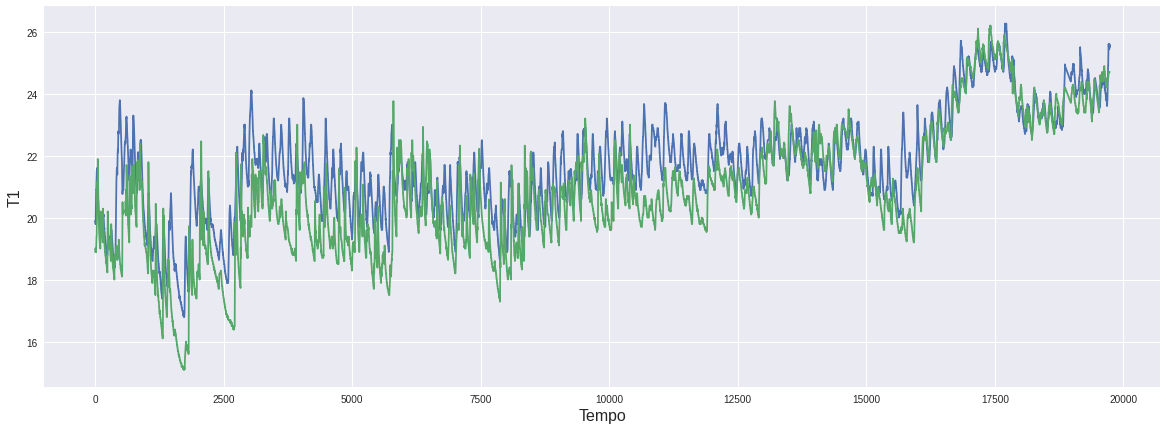

In [43]:
df_series[colunas[3]].plot(figsize=(20,7))
df_series[colunas[9]].plot(figsize=(20,7))
plt.xlabel("Tempo", size = 16,)
plt.ylabel(colunas[3], size = 16)
plt.show()

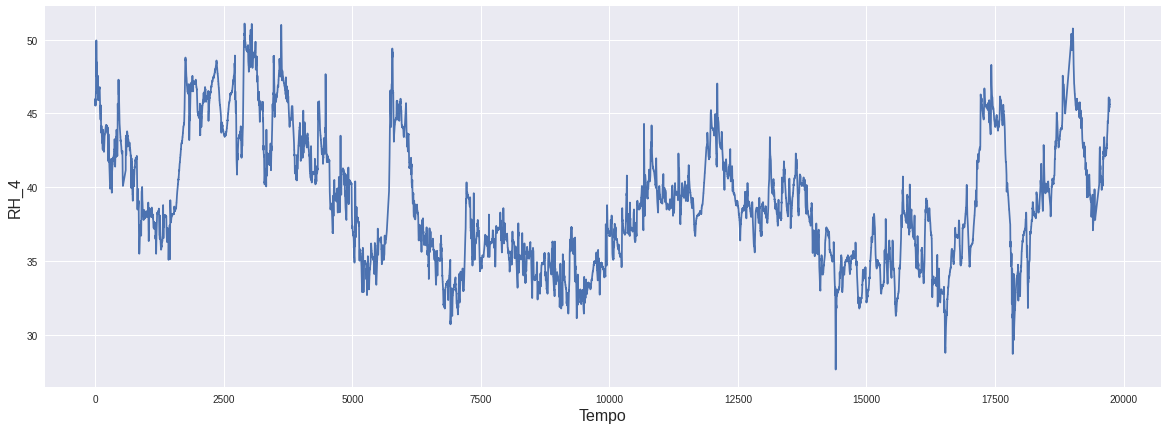

In [44]:
df_series[colunas[10]][:].plot(figsize=(20,7))
plt.xlabel("Tempo", size = 16,)
plt.ylabel(colunas[10], size = 16)
plt.show()

In [45]:
del df_series[colunas[0]]
del df_series[colunas[1]]
del df_series[colunas[2]]

del df_series[colunas[21]]
del df_series[colunas[22]]
del df_series[colunas[23]]
del df_series[colunas[24]]
del df_series[colunas[25]]
del df_series[colunas[26]]
del df_series[colunas[27]]
del df_series[colunas[28]]

In [46]:
array_st = np.array(df_series)
array_st.shape

(19735, 18)

## 2.1. Tratamento do ruido via alisamento exponencial simples
\begin{equation}
    MAE = \frac{1}{N}\sum_{i=1}^{N} |S_i - X_i|
\end{equation}

In [47]:
def MAE(list_st_lisa, list_st_normal):
    lista_erro = []
    for i in range(0, np.shape(list_st_lisa)[0]):
        soma = 0
        for j in range(0 , np.shape(list_st_lisa)[1]):

            soma += abs(list_st_lisa[i][j] - list_st_normal[:,i][j]) 
        erro = (1/len(list_st_lisa)) * soma 
        lista_erro.append(erro)

    return lista_erro

In [48]:
alfa_valor = [0.157, 0.234, 0.345, 0.456, 0.543, 0.688, 0.734, 0.888, 0.923, 0.999]

list_st_lisa = []
lista_erro_st = []
for i in range(0, len(alfa_valor)): # percorrendo todos os valores de alfa
    
    lista_alisa = []
    
    for j in range(0, array_st.shape[1]): # Percorrendo todos os sensores
        
        list_s = [] #lista criada para cada sensor
        
        list_s.append(array_st[:,j][0]) # pegando primeiro valor da serie
        
        alfa = alfa_valor[i] # pegando o primeiro valor de alfa
        
        for k in range(1, len(array_st[:,0])): # aplicado a formula em serie de um sensor 
            
            s =  (alfa * array_st[:,j][k]) + ((1 - alfa) * list_s[k-1])
            
            list_s.append(s) # Pegando todos os valores de uma serie lisa
            
        lista_alisa.append(list_s) # Pegando todas as series lisas para um alfa
        
    list_st_lisa.append(lista_alisa) # Pegando o daset todo alisado cm um valor de alfa
    erro_st = MAE(lista_alisa, array_st) # Calculando o erro MAE
    lista_erro_st.append(erro_st) # Quando os erros para da alfa

In [49]:
print(np.array(list_st_lisa).shape)
print(np.array(lista_erro_st).shape)

(10, 18, 19735)
(10, 18)


In [50]:
sum(lista_erro_st[9])/18

0.15368535003640804

In [51]:
lista_erro_st[9]

[0.03203105588418964,
 0.2012357618949727,
 0.05917809601845627,
 0.15513883716650748,
 0.03862309184372413,
 0.10060302427936839,
 0.03936114702301157,
 0.10273434404486359,
 0.04208749871096658,
 0.6103206167851797,
 0.17523809402363028,
 0.7412907938130373,
 0.025072078566871485,
 0.10651530710995416,
 0.03543146575176455,
 0.1600223370793464,
 0.018841515820778,
 0.12261123483872241]

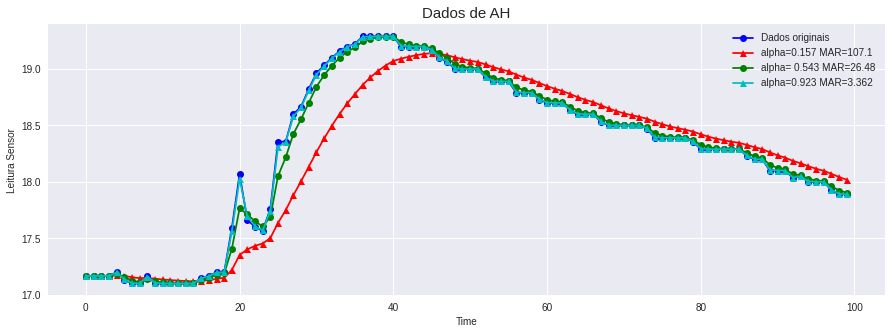

In [52]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(array_st[:,8][0:100],'bo-', label='Dados originais')
plt.plot(list_st_lisa[0][8][0:100],'r^-', 
         label='alpha=0.157 MAR='+str(lista_erro_st[0][8])[:5] )
plt.plot(list_st_lisa[4][8][0:100],'go-', 
         label='alpha= 0.543 MAR='+str(lista_erro_st[4][8])[:5] )
plt.plot(list_st_lisa[8][8][0:100],'c^-', 
         label='alpha=0.923 MAR='+str(lista_erro_st[8][8])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados de AH', fontsize=15)
plt.savefig("alisa_sensor.png", bbox_inches='tight')
plt.show()

## 2.2. Determinação da similaridade espacial (entre séries) baseada na matriz de correlação


\begin{equation}
     R_X = \frac{1}{5760} X'X = \frac{1}{5760} [ R_{ij} = \sum_{k=1}^{14400} X_{ik}X_{jk} ]
\end{equation}

\begin{equation}
    C_X = \frac{1}{5760} (X - m)'(X - m) = \frac{1}{5760} [ C_{ij} = \sum_{k=1}^{5760} (X_{ik} - m_i)(X_{jk} - m_k) ]
\end{equation}

\begin{equation}
    Ro_X = [ Ro_{ij} = \frac{C_{ij}}{\sqrt{v_iv_j}} ]
\end{equation}

In [53]:
array_st.shape

(19735, 18)

In [54]:
# Separando os dados em treinamneto e teste
Xtr = array_st[0:7894] # treinamento 40%
Xte = array_st[7894:15788] # teste 40%
Xval = array_st[15788:19735] # Validação 20%

In [55]:
R_x = (1/Xtr.shape[0]) * np.dot(Xtr.T, Xtr)

In [56]:
#  Calculando a matriz de covariancia de acordo com a formula
mean_x = np.mean(Xtr, axis=0)
X_central = Xtr - mean_x
C_x = (1/Xtr.shape[0]) * np.dot(X_central.T, X_central)
print(mean_x.shape)
print(C_x.shape)

(18,)
(18, 18)


In [57]:
# Calculando o vetor de variância
v = np.var(Xtr, axis=0)
print(v.shape)
v

(18,)


array([  1.69038525,  14.21638161,   2.08034341,  10.02022756,
         1.49703981,  10.43470823,   2.11259306,  20.75885232,
         1.26966106,  89.50192242,  16.85467167, 222.85480699,
         1.44828717,  29.55514603,   2.31342924,  29.58791241,
         0.91060703,  18.0856089 ])

In [58]:
# Calculando a matriz de coeficente de correção 
Ro_x = []
for i in range(0, 18):
    ro = []
    for j in range(0, 18):
        ro.append(C_x[i][j] / np.sqrt(v[i] * v[j]))
    Ro_x.append(ro)

In [59]:
Ro_x = np.array(Ro_x)
print(Ro_x.shape)

(18, 18)


In [60]:
# Função para calcular a similaridade entre as series

def simSetMax3(matriz_sim):
    sim_set_max = []
    sim_set_mim = []
    
    for i in range(0, 18):
        list_max_3 = []
        list_mim_3 = []
        
        st = list(matriz_sim[i])
        st[i] = 0 # Não pegando os das diagonais principais
        index_max = np.argsort(st)[::-1]
        
        # As 3 mais similares
        list_max_3.append(index_max[0])
        list_max_3.append(index_max[1])
        list_max_3.append(index_max[2])
        sim_set_max.append(list_max_3) # Pegnado o index da series mais similaries

    return sim_set_max # Retorna o index das 3 series mais similares entre se

In [61]:
# Calculando as 3 seriés mais limilares entre se usando o C_x
sim_max_cx = simSetMax3(C_x)
# Salvando dos dados das tabelas
#np.savetxt('resultados/2.2/sim_max_cx.txt', np.array(sim_max_cx), fmt='%4.f', delimiter='&')
#np.savetxt('resultados/2.2/sim_mim_cx.txt', np.array(sim_mim_cx), fmt='%4.f', delimiter='&')
print(sim_max_cx[2])

[9, 13, 7]


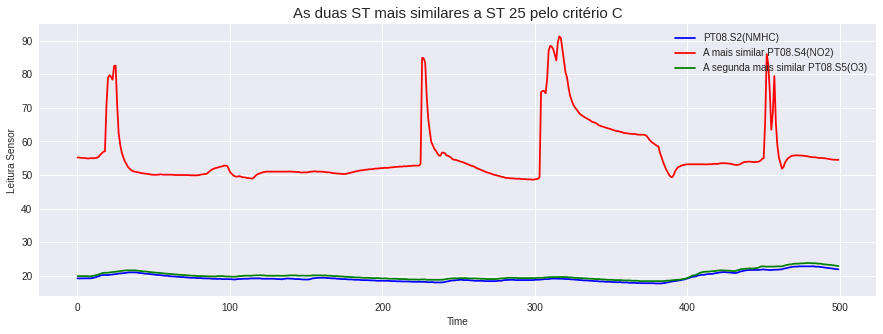

In [62]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,2][:500],'b', label='PT08.S2(NMHC)')
plt.plot(Xtr[:,9][:500],'r', 
         label='A mais similar PT08.S4(NO2)')
plt.plot(Xtr[:,0][:500],'g', 
         label='A segunda mais similar PT08.S5(O3)')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 25 pelo critério C', fontsize=15)
#plt.savefig("resultados/2.2/sim_c_max.png", bbox_inches='tight')
plt.show()

In [63]:
# Calculando as 3 seriés mais limilares entre se usando o Ro_x
sim_max_rox = simSetMax3(Ro_x)
#np.savetxt('resultados/2.2/sim_max_rox.txt', np.array(sim_max_rox), fmt='%4.f', delimiter='&')
#np.savetxt('resultados/2.2/sim_mim_rox.txt', np.array(sim_mim_rox), fmt='%4.f', delimiter='&')
print(sim_max_rox[4])

[0, 2, 16]


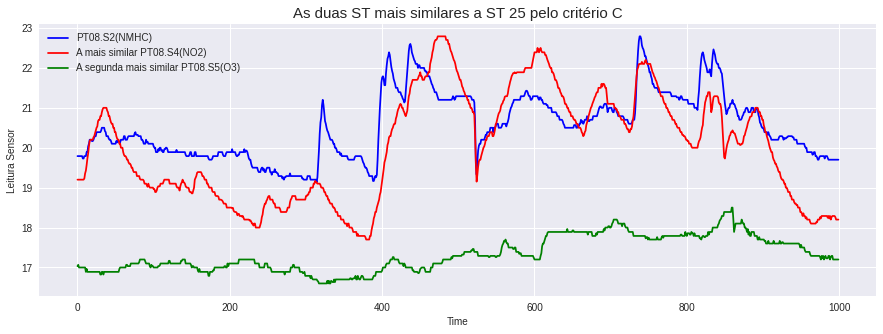

In [64]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,4][:1000],'b', label='PT08.S2(NMHC)')
plt.plot(Xtr[:,2][:1000],'r', 
         label='A mais similar PT08.S4(NO2)')
plt.plot(Xtr[:,16][:1000],'g', 
         label='A segunda mais similar PT08.S5(O3)')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 25 pelo critério C', fontsize=15)
#plt.savefig("resultados/2.2/sim_c_max.png", bbox_inches='tight')
plt.show()

In [65]:
# Função para encontrar a matriz Xtr_i item 2.3.1
def StMax3(Xtr,list_max_sim):
    
    Xtr_i = []
    # Percorrendo as 52 series temporais
    for i in range(0, Xtr.shape[1]):
        # Pegando as 3 mais similares de cada uma das 52 series
        max_st3 = list_max_sim[i]
        # Aqui vai as 4 series temporais [st.,i, st.,u, st.,v, st.,w]
        list_st_sim = []
        # Pgando a serie st.,i
        list_st_sim.append(Xtr[:,i])
        
        # Pegando as series st.,u, st.,v, st.,w
        for j in range(0, len(max_st3)):
            list_st_sim.append(Xtr[:,max_st3[j]-1])
        # Junatdo as lista Xtr_i
        Xtr_i.append(list_st_sim)
    
    return np.array(Xtr_i)

In [66]:
# Criado a matrizes Xtr_i com as três mais similares usando o Ro sim_max_rox 
mat_Xtr_i_Ro = StMax3(Xtr, sim_max_rox)
print(mat_Xtr_i_Ro.shape)
print(mat_Xtr_i_Ro[0].shape)

(18, 4, 7894)
(4, 7894)


In [67]:
# Função para obter o vetor m_i e matriz Cx_i
def meanCxM(Xtr_i):
    list_Cx_i = []
    list_mi = []
    for i in range(0, 18):
        Str_i =  Xtr_i[i].T # Transformando para [5760, 4]
        # Encontrado o vetor m_i da Xtr_i
        m_i = np.mean(Str_i, axis=0)
        # Criando a matriz Cx_i
        Str_i_central = Str_i - m_i
        Cx_i = (1/Xtr.shape[0]) * np.dot(Str_i_central.T, Str_i_central)
        # juntando matriz com todos os Cx_i
        list_Cx_i.append(Cx_i)
        list_mi.append(m_i)
        
    return  np.array(list_Cx_i), np.array(list_mi) # Retorna matriz com todos os Cx_i e m_i

In [68]:
list_Cx_i_Ro, list_mi = meanCxM(mat_Xtr_i_Ro)
print(list_Cx_i_Ro.shape)

(18, 4, 4)


In [69]:
def estimaLinear(mat_cov, mat_m):
    estima_x = []
    for i in range(0, 18): 
        # Encontrado a o valor esperado E[Y] (Media)
        E_Y = mat_m[i][1:]
        # Encontrado a matriz de covariancia de CY em C_X
        C_Y = mat_cov[i].copy()
        C_Y =  np.delete(C_Y, [0], axis=0) # removendo a linha de i
        C_Y =  np.delete(C_Y, [0], axis=1) # removendo a coluna de i
        C_x_y = mat_cov[i][1:,0] # matriz cruzada
        # Calculando o coeficiente a'
        a = np.dot(C_x_y, np.linalg.inv(C_Y))
        # Calculando o coeficente b
        b = mat_m[i][0] - np.dot(a.T, E_Y)
        
        estima_x.append([a, b])
    # Retorna os coefientes  de estimativa (a, b) de cada serie
    return estima_x

In [70]:
# Funcao para simular os 10% dos dados faltosos
def imputaData(data_test):
    # pegando os 10% de teste
    n = 0.10 * data_test.shape[0]
    rng = np.random.default_rng(seed=42 )
    list_index = []
    for i in range(0, 18):
        # Pegando 10% dos index de forma aleatoria de todas as series 
        indexs = rng.choice(range(4, data_test.shape[0]), size=(int(n)), replace=False)
        list_index.append(list(indexs))
    # Retorna as posicao das imputacao
    return list_index

In [71]:
# Estimação espacial
# Estimendo os valores amputados
def estimaVal(coe_estima, posi_imput, index_sim_max3, dados_test):
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    novos_dados = dados_test.copy()
    for i in range(0, 18):
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        # Estimar todos os dados imputados da serie i
        for j in posi_imput[i]:
            Y = []
            Y.append(dados_test[index_sim_max3[i][0]][j])
            Y.append(dados_test[index_sim_max3[i][1]][j])
            Y.append(dados_test[index_sim_max3[i][2]][j])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [72]:
# Colculando os coeficientes ('a, b) para todas as series
coe_estima_x = estimaLinear(list_Cx_i_Ro, list_mi)

In [73]:
# Estimando os novos dados de testes
index_data_imput = imputaData(Xte) # Simulando a falta de dados
esti_dados_test = estimaVal(coe_estima_x, index_data_imput, sim_max_rox, Xte)

In [74]:
# Calculando o erro 
erro_estima = MAE(esti_dados_test, Xte)
print(erro_estima)

[46.443049264465046, 805.5540058535078, 67.71012214343733, 182.0309795526915, 147.78718012148985, 234.37966144212143, 70.63422149519337, 337.0653239232562, 95.55911124057465, 434.5395158183585, 403.74772946724624, 1726.5747924297539, 69.48262100836116, 217.11127134596154, 49.1205607841806, 535.1065333796499, 48.73543913110325, 322.18890563959314]


In [75]:
sum(erro_estima)/18

321.87616800227465

In [96]:
MAEte = np.sum(np.abs(Xte - np.array(esti_dados_test).T), 0)/Xte.shape[0] # Mean Absolute Error (MAE)
print('MAEte',np.sum(MAEte)/18)

MAEte 0.7339461646872238


In [103]:
from sklearn.metrics import r2_score
r2_score(Xte, np.array(esti_dados_test).T)

0.2607436471288173

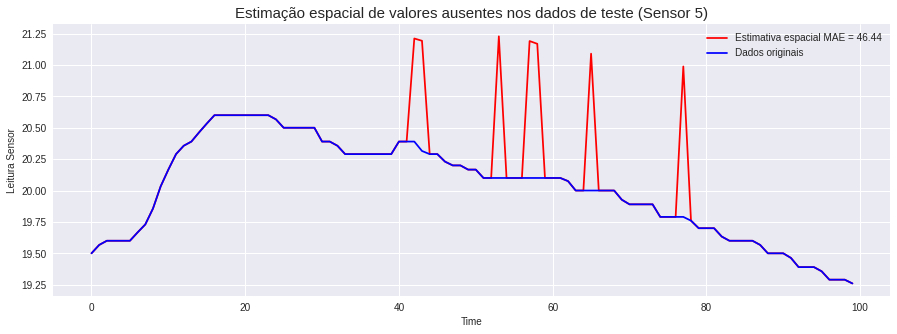

In [76]:
# Serie normal
plt.figure(figsize=(15,5))
plt.plot(esti_dados_test[0][0:100], 'r', 
         label='Estimativa espacial MAE = '+str(erro_estima[0])[:5])
plt.plot(Xte[0:,0][0:100],'b', label='Dados originais')
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espacial de valores ausentes nos dados de teste (Sensor 5)', fontsize=15)
#plt.savefig("resultados/2.3/estima_espacial.png", bbox_inches='tight')
plt.show()

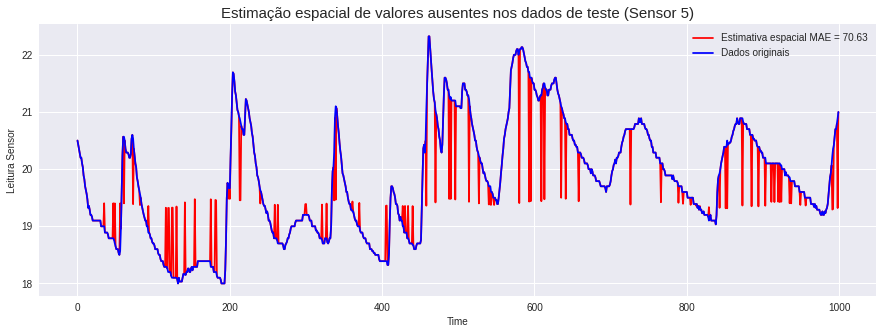

In [77]:
# Serie normal
plt.figure(figsize=(15,5))
plt.plot(esti_dados_test[6][0:1000], 'r', 
         label='Estimativa espacial MAE = '+str(erro_estima[6])[:5])
plt.plot(Xte[0:,6][0:1000],'b', label='Dados originais')
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espacial de valores ausentes nos dados de teste (Sensor 5)', fontsize=15)
#plt.savefig("resultados/2.3/estima_espacial.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação temporal
Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_i$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{i,.}$ e
versães de $st_{i,.}$ atrasadas no tempo, ou seja, $Xtr_j = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [78]:
# Realizando o atraso nas series (Xtrj)
Xtrj = []
for j in range(0, 18): # As 52 series
    stj = Xtr[:,j]
    st_atra_3 = []
    st_atra_3.append(stj)
    # Os tres valores de atraso
    for k in range(1, 4): #  k = 1, 2, 3
        stj_atra = []
        # 0 a 5760, percorrendo todos os valores da serie
        for i in range(0, stj.shape[0]):
            stj_atra.append(stj[i-k])
        # Pegando a serie atrasada com -1, -2, -3
        st_atra_3.append(stj_atra)
    # Adicionando a serie j e as tres atrasadas
    Xtrj.append(st_atra_3)
np.array(Xtrj).shape

(18, 4, 7894)

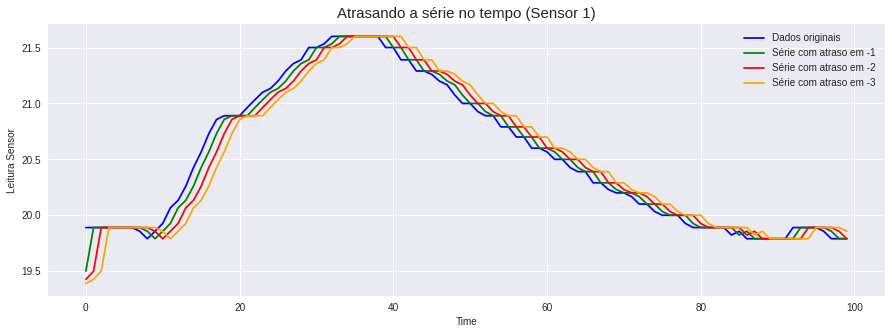

In [79]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtrj[0][0][0:100],'b', label='Dados originais')
plt.plot(Xtrj[0][1][0:100],'g', 
         label='Série com atraso em -1')
plt.plot(Xtrj[0][2][0:100],'r', 
         label='Série com atraso em -2')

plt.plot(Xtrj[0][3][0:100],color='orange', 
         label='Série com atraso em -3')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Atrasando a série no tempo (Sensor 1)', fontsize=15)
#plt.savefig("resultados/2.3/atrso_temp01.png", bbox_inches='tight')
plt.show()

In [80]:
# Criando as matrizes de covariancia da estimacao temporal
Xtrj = np.array(Xtrj)
list_Cx_j_Ro, list_mj = meanCxM(Xtrj)

In [81]:
# Colculando os coeficientes ('a, b) para todas as series atrasadas 
coe_estima_xj = estimaLinear(list_Cx_j_Ro, list_mj)

In [82]:
# Estimendo os valores amputados (Estimação temporal)
def estTem(coe_estima, dados_test, posi_imput):
    novos_dados = dados_test.T.copy()
    dados_test = dados_test.T
    for i in range(0, 18):
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        index_imput = sorted(posi_imput[i]) # Os index de onde foram imputados os dados da serie i
        # Estimar todos os dados imputados da serie i
        for j in index_imput:
            Y = []
            Y.append(dados_test[i][j-1])
            Y.append(dados_test[i][j-2])
            Y.append(dados_test[i][j-3])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados faltosos pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [99]:
# Estimando os novos dados de testes (estimacao temporal)
est_temp_dados_test = estTem(coe_estima_xj, Xte, index_data_imput)

In [84]:
# Calculando o erro com a estimacao temporal
erro_est_temp = MAE(est_temp_dados_test, Xte)
print(erro_est_temp)

[1.4005645586642896, 7.048494981738809, 1.9991289831451773, 5.468851302241628, 1.498020376194012, 3.343503445725066, 1.5184502822527417, 3.2564285739663603, 1.5565632670154232, 22.594707921610446, 5.299887061374927, 27.50309945204737, 1.2238524905459078, 3.0857678807416637, 1.4932763559219224, 4.2069718005628935, 0.9354457635626262, 3.6282161411366762]


In [100]:
est_temp_dados_test = np.array(est_temp_dados_test).T

In [101]:
MAEte = np.sum(np.abs(Xte - est_temp_dados_test),0)/Xte.shape[0] # Mean Absolute Error (MAE)
print('MAEte',np.sum(MAEte)/18)

MAEte 0.012295570134082591


In [102]:
from sklearn.metrics import r2_score
r2_score(Xte, est_temp_dados_test)

0.9994478029016377

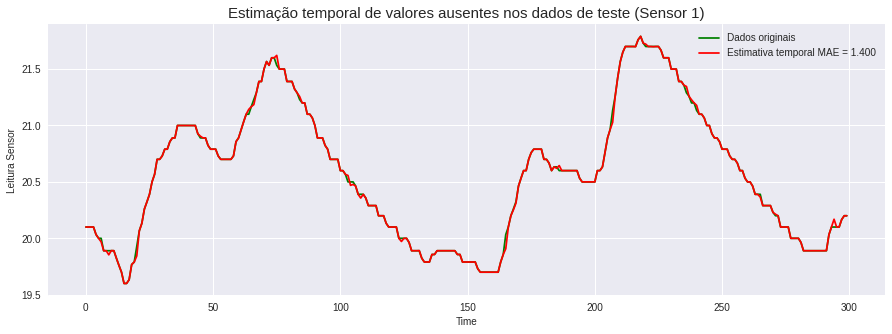

In [87]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xte[0:,0][700:1000],'g', label='Dados originais')
plt.plot(est_temp_dados_test[0][700:1000],'r', 
         label='Estimativa temporal MAE = '+str(erro_est_temp[0])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação temporal de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
#plt.savefig("resultados/2.3/estima_temp.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação espaço-temporal
Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_j$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{j,.}$ e
versães de $st_{j,.}$ atrasadas no tempo, em parelhadas com $st_{.,u}, st_{.,v}, st_{.,w} $, ou seja,   $Xtr_{ij} = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j}, st_{i,u}, st_{i,v}, st_{i,w} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [88]:
#Xtrj  Series atrazadas no tempo
#mat_Xtr_i_Ro  Series mais similares 
list_Cx_ji = []
for i in range(0, 18):
    list_Cx_ji7 = []
    list_Cx_ji7.append(mat_Xtr_i_Ro[i][0])
    # Espacial
    for j in range(1, 4): # j = 1, 2, 3
        list_Cx_ji7.append(mat_Xtr_i_Ro[i][j])
    # Temporal
    for l in range(1, 4): # j = 1, 2, 3
        list_Cx_ji7.append(Xtrj[i][l])
    list_Cx_ji.append(list_Cx_ji7) # (52, 7, 5760)

In [89]:
list_Cx_ji = np.array(list_Cx_ji)
list_Cx_ji.shape

(18, 7, 7894)

In [90]:
# Criando as matrizes de covariancia da estimacao espaco-temporal
list_Cx_ij_Ro, list_mij = meanCxM(list_Cx_ji)
list_Cx_ij_Ro.shape

(18, 7, 7)

In [91]:
# Estimendo os valores amputados
def estEspTem(coe_estima, posi_imput, index_sim_max3, dados_test):
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    novos_dados = dados_test.copy()
    for i in range(0, 18):
        
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        index_imput = sorted(posi_imput[i]) 
        # Estimar todos os dados imputados da serie i
        for j in posi_imput[i]:
            Y = []
            # Pegando os valores das similares
            Y.append(dados_test[index_sim_max3[i][0]][j])
            Y.append(dados_test[index_sim_max3[i][1]][j])
            Y.append(dados_test[index_sim_max3[i][2]][j])
            # Pegando os valores atrazados
            Y.append(dados_test[i][j-1])
            Y.append(dados_test[i][j-2])
            Y.append(dados_test[i][j-3])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados faltosos pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [92]:
# Colculando os coeficientes ('a, b) para todas as series 
coe_estima_xij = estimaLinear(list_Cx_ij_Ro, list_mij)
# Estimando os novos dados de testes (estimacao temporal)
est_esp_temp_dados = estEspTem(coe_estima_xij, index_data_imput, sim_max_rox, Xte)

In [93]:
# Calculando o erro com a estimacao temporal
erro_est_esp_temp = MAE(est_esp_temp_dados, Xte)
print(erro_est_esp_temp)

[1.625814176777352, 7.340362451281763, 2.009011774676102, 5.512468501788871, 1.7580513753937894, 3.6900095386177445, 1.6010036912673022, 3.957187892317762, 2.045871843199479, 28.64810564738789, 6.055810668113296, 27.80403615177654, 1.4113739777374257, 8.48337348583956, 1.5843270369906763, 5.8844798277425046, 1.179498434159936, 3.8422357593883847]


In [94]:
sum(erro_est_esp_temp)/18

6.357390124136466

In [106]:
MAEte = np.sum(np.abs(Xte - np.array(est_esp_temp_dados).T),0)/Xte.shape[0] # Mean Absolute Error (MAE)
print('MAEte',np.sum(MAEte)/18)

MAEte 0.01449620246192759


In [107]:
from sklearn.metrics import r2_score
r2_score(Xte, np.array(est_esp_temp_dados).T)

0.9993978567583591

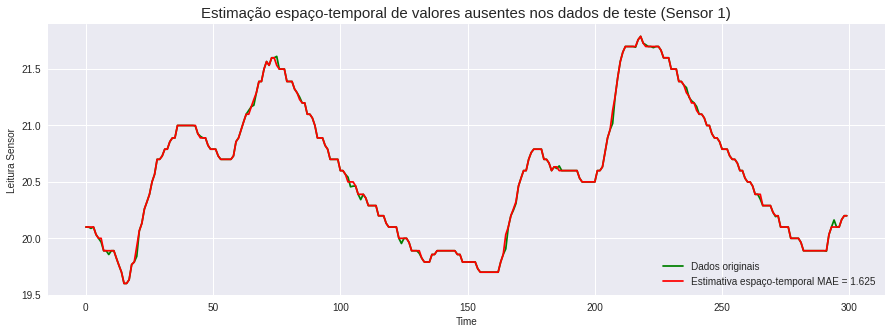

In [95]:
plt.figure(figsize=(15,5))
plt.plot(est_esp_temp_dados[0][700:1000], 'g', label='Dados originais')
plt.plot(Xte[:,0][700:1000], 'r', 
         label='Estimativa espaço-temporal MAE = '+str(erro_est_esp_temp[0])[:5])
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espaço-temporal de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
#plt.savefig("resultados/2.3/estima_espa-temp.png", bbox_inches='tight')
plt.show()